In [80]:
"""
PROJETO 1

Pergunta: Existe relacao entre a producao de eletricidade por pessoa e o IDH de um pais?
aluno: Bruno Kaczelnik
"""

'\nPROJETO 1\n\nPergunta: Existe relacao entre a producao de eletricidade por pessoa e o IDH de um pais?\naluno: Bruno Kaczelnik\n'

In [81]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt


In [82]:
elctricity = pd.read_excel('Electricity Generation per capita.xls.xlsx')
HDI=pd.read_excel('Indicator_HDI.xlsx')

In [83]:
elctricity.head()


,Electricity generation per person (kilowatt-hours),1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Algeria,641.768667,675.180047,695.328186,721.369338,722.570425,702.036811,722.292263,727.503752,799.931710,826.260927,822.379996,851.044023,875.855008,920.484917,962.516360,1033.172011,1063.064174,1108.533902,1185.163977
1,Argentina,1542.598522,1613.957173,1656.765152,1817.099848,1882.204332,1902.209136,1951.104770,2001.548857,2024.082240,2177.951519,2372.890432,2377.272622,2206.588218,2375.970124,2561.441632,2669.461079,2934.284105,2998.070043,3074.364632
2,Australia,9162.424004,9169.912304,9249.411551,9363.724962,9525.692722,9687.698355,9832.092495,10209.992942,10637.873333,10837.321973,11077.756825,11447.806995,11625.385895,11567.823084,11921.567985,12392.373546,12571.479922,12752.806866,13216.047916
3,Austria,6527.813907,6584.959652,6466.228737,6593.771949,6640.764169,7031.683271,6802.630789,7044.841829,7109.752133,7458.344020,7616.769909,7600.265136,7691.286244,7377.378148,7863.837504,7407.976673,7737.694193,7773.498396,8262.229888
4,Azerbaijan,3222.294724,3195.801399,2653.630117,2547.616078,2320.233410,2233.728701,2228.408478,2183.200970,2320.454809,2341.789782,2413.475297,2440.969686,2398.026184,2718.253289,2763.464167,2890.808286,3082.664468,2724.979167,2679.228220


In [84]:
elctricity_2008 = elctricity.loc[:, ["Electricity generation per person (kilowatt-hours)", 2008]]
HDI_2008 = HDI.loc[:, ["HDI", 2008]]


In [85]:
elctricity_2008_idx=elctricity_2008.set_index('Electricity generation per person (kilowatt-hours)')
HDI_2008_idx= HDI_2008.set_index('HDI')

In [86]:
elctricity_2008_idx.head()

,2008
Electricity generation per person (kilowatt-hours),
Algeria,1185.163977
Argentina,3074.364632
Australia,13216.047916
Austria,8262.229888
Azerbaijan,2679.228220


In [87]:
HDI_2008_idx.head()

,2008
HDI,
Abkhazia,NaN
Afghanistan,0.370
Akrotiri and Dhekelia,NaN
Albania,0.733
Algeria,0.686


In [88]:
data = elctricity_2008_idx.join(HDI_2008_idx, how='inner', lsuffix='_electricity', rsuffix='_HDI')
data.head(7)

,2008_electricity,2008_HDI
Algeria,1185.163977,0.686
Argentina,3074.364632,0.786
Australia,13216.047916,0.924
Austria,8262.229888,0.876
Azerbaijan,2679.228220,NaN
Bangladesh,179.078834,0.484
Belarus,3393.482961,0.744


In [89]:
data.to_csv( 'electricity_HDI.csv', index=True)

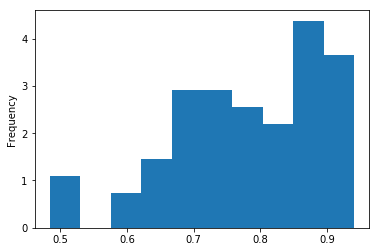

In [90]:
data["2008_HDI"].plot.hist(density=True);

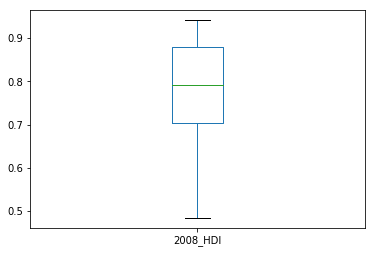

In [91]:
data["2008_HDI"].plot.box();

In [92]:
data["2008_HDI_ordinal"] = pd.cut(data["2008_HDI"], bins=10)

In [93]:
data["2008_HDI_ordinal"]

Algeria                 (0.667, 0.712]
Argentina               (0.758, 0.804]
Australia               (0.895, 0.941]
Austria                  (0.85, 0.895]
Azerbaijan                         NaN
Bangladesh               (0.484, 0.53]
Belarus                 (0.712, 0.758]
Brazil                  (0.667, 0.712]
Bulgaria                (0.758, 0.804]
Canada                  (0.895, 0.941]
Chile                   (0.758, 0.804]
China                   (0.621, 0.667]
Colombia                (0.667, 0.712]
Denmark                  (0.85, 0.895]
Ecuador                 (0.712, 0.758]
Egypt                   (0.621, 0.667]
Finland                  (0.85, 0.895]
France                   (0.85, 0.895]
Germany                 (0.895, 0.941]
Greece                   (0.85, 0.895]
Hong Kong, China         (0.85, 0.895]
Hungary                  (0.804, 0.85]
Iceland                  (0.85, 0.895]
India                    (0.484, 0.53]
Indonesia               (0.575, 0.621]
Iran                    (

In [94]:
faixas = data["2008_HDI_ordinal"].value_counts(sort=False)
faixas

(0.484, 0.53]      3
(0.53, 0.575]      0
(0.575, 0.621]     2
(0.621, 0.667]     4
(0.667, 0.712]     8
(0.712, 0.758]     8
(0.758, 0.804]     7
(0.804, 0.85]      6
(0.85, 0.895]     12
(0.895, 0.941]    10
Name: 2008_HDI_ordinal, dtype: int64

In [98]:
'faixas.plot.bar();'

'faixas.plot.bar();'

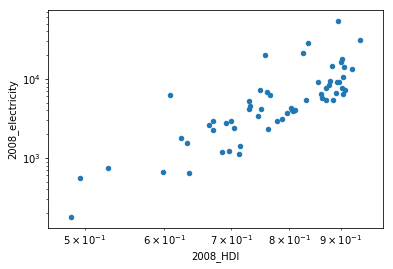

In [96]:
data.plot.scatter(x="2008_HDI", y = "2008_electricity", loglog=True)

In [97]:
"""
podemos perceber, principalmente neste ultimo grafico, que relaciona 
o IDH com a producao de eletricidade por pessoa , que quanto maior o 
IDH de um pais, maior a produtividade eletrica, assim aparentado ser uma 
relacao de causa e consequencia
"""

'\npodemos perceber, principalmente neste ultimo grafico, que relaciona \no IDH com a producao de eletricidade por pessoa , que quanto maior o \nIDH de um pais, maior a produtividade eletrica, assim aparentado ser uma \nrelacao de causa e consequencia\n'